 Your name:

<pre> Yingjia Zhai</pre> 

## Explanation ： this homework was my 3251 final project. I am adding the answer on the back, starting from line 39.


Split data into training (80%) and testing (20%)
- Follow similar procedure as the one for week 2 (End-to-end Machine Learning Project). Remember apendix B
- Study the ROC Curve, decide threshold
- Use 2 classifiers.
    - Random Forest
        - tune only: n_estimators: {4, 5, 10, 20, 50} 
    - KNN Classfier 
        - tune only: n_neighbors: {3, 5, 10, 20} 
    - Which one performs better in the cross validation?
    
http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

- Cross-validation with 5-folds

- Other paramenters -> Use default



In [57]:
import numpy as np
import pandas as pd

# to make this notebook's output stable across runs
np.random.seed(123)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12


# Predicting defaulting on credit card applications


This project aimed at analyzing customers default payments in Taiwan and compares the predictive accuracy of default by using different classification methods, and pick the best one to make predictions.



## Synopysis

This notebook unfolds in the following phases:

 Load the credit card default dataset

 Data Preparation

 Build models- Logistic Regression, Classification Trees, and Naive Bayes

 Model Evaluation and comparison

 Make predictions


## Data Set Information:

This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables: 


   ----------------------------------------------------------------------------------------
   Name                 Explantion        
   -------------------- -------------------------------------------------------------------
   limit_bal            Amount of the given credit (NT dollar): 
                        it includes both the individual consumer credit 
                        and his/her family (supplementary) credit.

   sex                  Gender 
                        (1 = male; 2 = female)

   education            Education
                        (1 = graduate school; 2 = university; 3 = high school; 4 = others)

   marriage             Marital status 
                        (1 = married; 2 = single; 3 = others)

   age                  Age (years)

   pay_1 - pay_6        History of past payment. Past monthly payment records 
                        From April to September, 2005 as follows:

                        pay_1 = the repayment status in September, 2005
                        pay_2 = the repayment status in August, 2005
                        ...
                        pay_6 = the repayment status in April, 2005 

  ** The measurement scale for the repayment status is: **
                        -1 = pay duly; 
                         1 = payment delay for one month 
                         2 = payment delay for two months
                         ...
                         8 = payment delay for eight months 
                         9 = payment delay for nine months and above

   bill_amt1-bill_amt5  Amount of bill statement (NT dollar). 
                        bill_amt1 = amount of bill statement in September, 2005 
                        bill_amt2 = amount of bill statement in August, 2005
                        ...
                        bill_amt6= amount of bill statement in April, 2005 

   pay_amt1-pay_amt6    Amount of previous payment (NT dollar)
                        pay_amt1 = amount paid in September, 2005
                        pay_amt2 = amount paid in August, 2005
                        ...
                        pay_amt6 = amount paid in April, 2005 
                        

**Default payment next month**：as we are working on a binary classfication task, so we have two possible values: default: 1, or pay: 0


## Modeling

Will compare the predictive power of three classification algorithms in scikit-learn

 1. Logistic regression 
 
 2. Classification Trees
 
 3. Naive Bayes Classifier


## Techniques

one-hot encoding to encode the information in categorical features.

   For example: Education
        
        1 = graduate school; 2 = university; 3 = high school; 4 = others
        
        
    After Encode:
        
        Graduate:    1 0 0
        University:  0 1 0
        High school: 0 0 1
        Others:      0 0 0 
        
        

## Importing useful libraries

In [58]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

## Data Preparation 

  1. Load CSV file
  2. Encode categorical features, 'EDUCATION','SEX', 'MARRIAGE'
  3. Rescale variables

In [59]:
# Load data

default = pd.read_csv('default of credit card clients.csv',index_col='ID')
default.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [60]:
# Creating dummy features for 'EDUCATION', and then drop 'EDUCATION'

default['grad_school']=(default['EDUCATION']== 1).astype('int')
default['university']=(default['EDUCATION']== 2).astype('int')
default['high_school']=(default['EDUCATION']== 3).astype('int')
default.drop('EDUCATION',axis=1,inplace=True)
default.columns

Index(['LIMIT_BAL', 'SEX', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3',
       'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3',
       'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2',
       'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month', 'grad_school', 'university',
       'high_school'],
      dtype='object')

In [61]:
# Creating dummy features for 'SEX' and 'MARRIAGE', and then drop 'SEX' and 'MARRIAGE'

default['male']=(default['SEX'] ==1).astype('int')
default.drop('SEX',axis=1,inplace=True)
default['married']=(default['MARRIAGE'] ==1).astype('int')
default.drop('MARRIAGE',axis=1,inplace=True)

In [62]:
# for pay features if the value <=0 then it will change to 0, and means it was not delayed

pay_features=['PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']
for p in pay_features:
    default.loc[default[p]<=0,p]=0


In [63]:
# Change all column's name into lower case and change colunm name 'default payment next month' as 'default

default.columns = [x.lower() for x in default.columns]
default.rename(columns={'default payment next month':'default'},inplace=True)
default.columns

Index(['limit_bal', 'age', 'pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5',
       'pay_6', 'bill_amt1', 'bill_amt2', 'bill_amt3', 'bill_amt4',
       'bill_amt5', 'bill_amt6', 'pay_amt1', 'pay_amt2', 'pay_amt3',
       'pay_amt4', 'pay_amt5', 'pay_amt6', 'default', 'grad_school',
       'university', 'high_school', 'male', 'married'],
      dtype='object')

In [64]:
# Seperate variables and result into x,y

target_name='default'
x=default.drop('default', axis=1)
x.head()

,limit_bal,age,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt1,bill_amt2,...,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,grad_school,university,high_school,male,married
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,24,2,2,0,0,0,0,3913,3102,...,689,0,0,0,0,0,1,0,0,1
2,120000,26,0,2,0,0,0,2,2682,1725,...,1000,1000,1000,0,2000,0,1,0,0,0
3,90000,34,0,0,0,0,0,0,29239,14027,...,1500,1000,1000,1000,5000,0,1,0,0,0
4,50000,37,0,0,0,0,0,0,46990,48233,...,2019,1200,1100,1069,1000,0,1,0,0,1
5,50000,57,0,0,0,0,0,0,8617,5670,...,36681,10000,9000,689,679,0,1,0,1,1


In [65]:
# Set all the variables to the same scale as they have very different scales.
# For example: Amount and age
# Scaling x by using robustscaler

from sklearn.preprocessing import RobustScaler

robust_scaler=RobustScaler()
x=robust_scaler.fit_transform(x)
x


array([[-0.63157895, -0.76923077,  2.        , ...,  0.        ,
         0.        ,  1.        ],
       [-0.10526316, -0.61538462,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.26315789,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-0.57894737,  0.23076923,  4.        , ...,  0.        ,
         1.        ,  0.        ],
       [-0.31578947,  0.53846154,  1.        , ...,  1.        ,
         1.        ,  1.        ],
       [-0.47368421,  0.92307692,  0.        , ...,  0.        ,
         1.        ,  1.        ]])

In [66]:
# Result y

y= default[target_name]
pd.value_counts(y)


0    23364
1     6636
Name: default, dtype: int64

## Prepare training and testing dataset

**From sklearn.model_selecting import train_test_spilt()

The parameter stratify

According to the proportion of the original data, assign to the train and test, make the ratio of all data in the trainset and the testset the same as the original data set.

random_state=123 means, after splitting, both the ratio of trainset and testset are A:B:C =1:2:3

Stratify = X is assigned in proportion to X

Stratify = Y is assigned in proportion to Y


Generally, set stratify as Y

In [67]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, precision_recall_curve


In [68]:
# Subset training and testing data, use cross validation to evaluate the model

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=123,stratify=y)

## Functions to print and plot confusion matrix

In [69]:
# Print confusion matrix

def CMatrix(CM, labels=['pay','default']):
    df=pd.DataFrame(data=CM, index=labels, columns=labels)
    df.index.name='TRUE'
    df.columns.name='PREDICTION'
    df.loc['Total']=df.sum()
    df['Total']=df.sum(axis=1)
    return df

In [70]:
# Plot confusion matrix

import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
     
    else:
        1#print('Confusion matrix')


    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

## Preparing a DataFram for model analysis

Accuracy - Accuracy is the ratio of correctly predicted observation to the total observations.

Accuracy = TP+TN/TP+FP+FN+TN

Precision - Precision is the ratio of correctly predicted positive observations to the total predicted positive observations. 

Precision = TP/(TP+FP)

Recall (Sensitivity) - Recall is the ratio of correctly predicted positive observations to the all observations in actual class - yes

Recall = TP/(TP+FN)

For this case: 

Accuracy: the ratio of correctly predicted customers as defaulters 

Precision: For all customers that labelled as defaulters, how many actually are correct.

Recall: of all customers that truly default, how many did we correctly predict.


## Hypothesis


H0: Null Hypothesis: A person who wil pay

**True Positive** : A person is a defaulter

**False Postive** : Predicted a person will pay, but he is a defaulter in actual.

**True Negative** : A person is not a defaulter

**False Negative** : A person who is a defaulter in real, but predicted as a payer.



Will Use ***confusion matrix*** to evaluate 


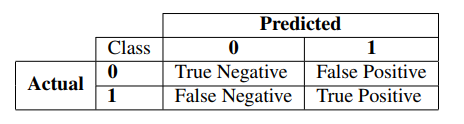


## The Null model

To be used as a base to see how good of our model

In [71]:
# Data frame for evaluation metrics

metrics = pd.DataFrame(index=['accuracy','precision','recall'],columns=['NULL','LogisticReg','ClassTree','NaiveBayes'])
metrics

,NULL,LogisticReg,ClassTree,NaiveBayes
accuracy,NaN,NaN,NaN,NaN
precision,NaN,NaN,NaN,NaN
recall,NaN,NaN,NaN,NaN


In [72]:
y_pred_test=np.repeat(y_train.value_counts().idxmax(), y_test.size)
metrics.loc['accuracy','NULL'] = accuracy_score(y_pred=y_pred_test,y_true=y_test)
metrics.loc['precision','NULL'] = precision_score(y_pred=y_pred_test,y_true=y_test)
metrics.loc['recall','NULL'] = recall_score(y_pred=y_pred_test,y_true=y_test)


C:\Users\kellyzhai\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


In [73]:

CM = confusion_matrix(y_pred=y_pred_test,y_true=y_test)
CMatrix(CM)



PREDICTION,pay,default,Total
TRUE,,,
pay,4673,0,4673
default,1327,0,1327
Total,6000,0,6000


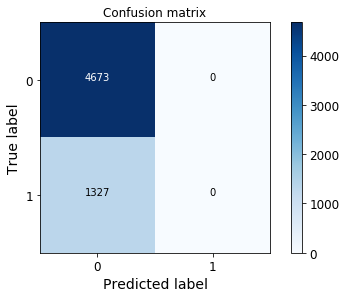

In [74]:
# Plot confusion matrix

class_names = [0,1]
plt.figure()
plot_confusion_matrix(CM
                      , classes=class_names
                      , title='Confusion matrix')
plt.show()

## Logistic Regression Model

In [75]:
# 1. Import the estimator object (model)
from sklearn.linear_model import LogisticRegression

#2. Create an instance of the estimator and get same result 
logistic_regression = LogisticRegression(n_jobs=-1, random_state=15)

#3. Use the traning data to train the estimater
logistic_regression.fit(x_train,y_train)

# 4. Evaluate the model
y_pred_test = logistic_regression.predict(x_test)
metrics.loc['accuracy','LogisticReg'] = accuracy_score(y_pred=y_pred_test,y_true=y_test)
metrics.loc['precision','LogisticReg'] = precision_score(y_pred=y_pred_test,y_true=y_test)
metrics.loc['recall','LogisticReg'] = recall_score(y_pred=y_pred_test,y_true=y_test)
CM = confusion_matrix(y_pred=y_pred_test,y_true=y_test)
CMatrix(CM)


C:\Users\kellyzhai\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


PREDICTION,pay,default,Total
TRUE,,,
pay,4480,193,4673
default,894,433,1327
Total,5374,626,6000


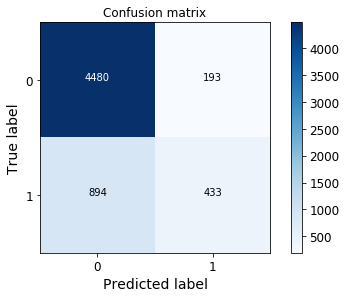

In [76]:
# Plot confusion matrix

class_names = [0,1]
plt.figure()
plot_confusion_matrix(CM
                      , classes=class_names
                      , title='Confusion matrix')
plt.show()

## Classification Trees

In [77]:
# 1. Import the estimator object (model)
from sklearn.tree import DecisionTreeClassifier

#2. Create an instance of the estimator
class_tree = DecisionTreeClassifier(min_samples_split=30,min_samples_leaf=10,random_state=10)

#3. Use the traning data to train the estimater
class_tree.fit(x_train,y_train)

# 4. Evaluate the model
y_pred_test = class_tree.predict(x_test)
metrics.loc['accuracy','ClassTree'] = accuracy_score(y_pred=y_pred_test,y_true=y_test)
metrics.loc['precision','ClassTree'] = precision_score(y_pred=y_pred_test,y_true=y_test)
metrics.loc['recall','ClassTree'] = recall_score(y_pred=y_pred_test,y_true=y_test)
CM = confusion_matrix(y_pred=y_pred_test,y_true=y_test)
CMatrix(CM)

PREDICTION,pay,default,Total
TRUE,,,
pay,4226,447,4673
default,827,500,1327
Total,5053,947,6000


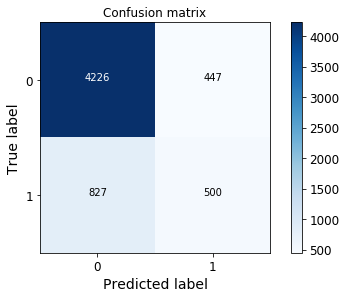

In [78]:
# Plot confusion matrix

class_names = [0,1]
plt.figure()
plot_confusion_matrix(CM
                      , classes=class_names
                      , title='Confusion matrix')
plt.show()

## C.Naive Bayes Classifier


In [79]:
# 1. Import the estimator object (model)

from sklearn.naive_bayes import GaussianNB

#2. Create an instance of the estimator

NBC=GaussianNB()

#3. Use the traning data to train the estimater
NBC.fit(x_train,y_train)

# 4. Evaluate the model
y_pred_test = NBC.predict(x_test)
metrics.loc['accuracy','NaiveBayes'] = accuracy_score(y_pred=y_pred_test,y_true=y_test)
metrics.loc['precision','NaiveBayes'] = precision_score(y_pred=y_pred_test,y_true=y_test)
metrics.loc['recall','NaiveBayes'] = recall_score(y_pred=y_pred_test,y_true=y_test)
CM = confusion_matrix(y_pred=y_pred_test,y_true=y_test)
CMatrix(CM)

PREDICTION,pay,default,Total
TRUE,,,
pay,3877,796,4673
default,585,742,1327
Total,4462,1538,6000


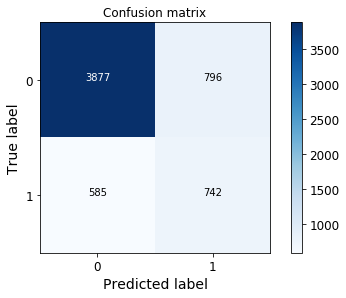

In [80]:
# Plot confusion matrix

class_names = [0,1]
plt.figure()
plot_confusion_matrix(CM
                      , classes=class_names
                      , title='Confusion matrix')
plt.show()

## Result of dataframe metrics and recall ratio

In [81]:
100*metrics

,NULL,LogisticReg,ClassTree,NaiveBayes
accuracy,77.8833,81.8833,78.7667,76.9833
precision,0,69.1693,52.7983,48.2445
recall,0,32.63,37.679,55.9156


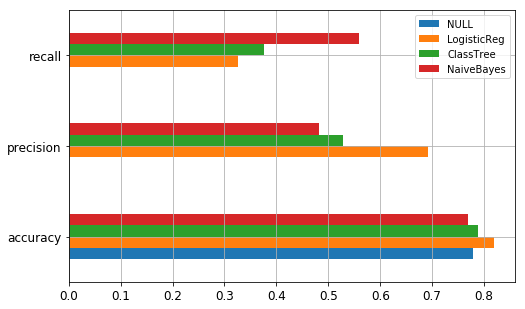

In [82]:
# Plot metrics and turns out NavieBayes is the best model when look at recall rate.

fig, ax=plt.subplots(figsize=(8,5))
metrics.plot(kind='barh',ax=ax)
ax.grid();

## Use precision_recall_curve to see the relationship between presicion and recall with LogisticRegression and NaiveBayes model 

In [83]:
precision_nb, recall_nb, thresholds_nb = precision_recall_curve(y_true=y_test,probas_pred=NBC.predict_proba(x_test)[:,1])

In [84]:
precision_lr, recall_lr, thresholds_lr = precision_recall_curve(y_true=y_test,probas_pred=logistic_regression.predict_proba(x_test)[:,1])

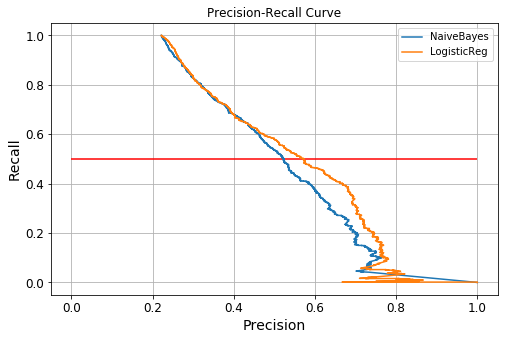

In [85]:
#Plot Precision Recall Curve
#From the curve we can see, for a given level of recall,logistics regression is doing a little bit better than NaiveBayes

fig, ax=plt.subplots(figsize=(8,5))
ax.plot(precision_nb, recall_nb, label='NaiveBayes')
ax.plot(precision_lr, recall_lr, label='LogisticReg')
ax.set_xlabel('Precision')
ax.set_ylabel('Recall')
ax.set_title('Precision-Recall Curve')
ax.hlines(y=0.5, xmin=0, xmax=1, color='red')
ax.legend()
ax.grid();

## The relationship between Classification Threshold and Precision-Recall for Logistic Regression model 

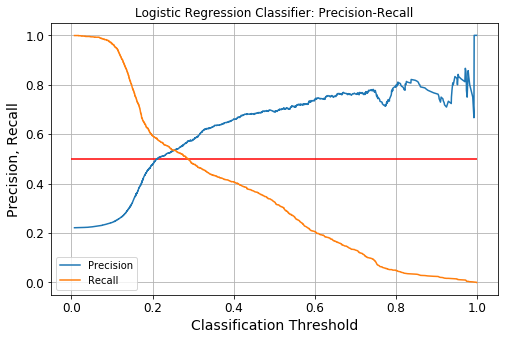

In [86]:
fig, ax=plt.subplots(figsize=(8,5))
ax.plot(thresholds_lr, precision_lr[1:], label='Precision')
ax.plot(thresholds_lr, recall_lr[1:], label='Recall')
ax.set_xlabel('Classification Threshold')
ax.set_ylabel('Precision, Recall')
ax.set_title('Logistic Regression Classifier: Precision-Recall')
ax.hlines(y=0.5, xmin=0, xmax=1, color='red')
ax.legend()
ax.grid();

## Get better recall ratio of logistic regression model by adjusting classification threshold to 0.2

In [87]:
# When threshold is 0.2, we will have a about 60% recall and 50% precision.
# Default classification threshold is 0.5 where we only have 32% recall ratio.

y_pred_proba= logistic_regression.predict_proba(x_test)[:,1]
y_pred_test = (y_pred_proba >=0.2).astype('int')


In [88]:
CM = confusion_matrix(y_pred=y_pred_test,y_true=y_test)
print("Recall:", 100*recall_score(y_pred=y_pred_test, y_true = y_test))
print("Precision:",100*precision_score(y_pred=y_pred_test, y_true= y_test))
CMatrix(CM)

Recall: 59.23134890730972
Precision: 47.78115501519757


PREDICTION,pay,default,Total
TRUE,,,
pay,3814,859,4673
default,541,786,1327
Total,4355,1645,6000


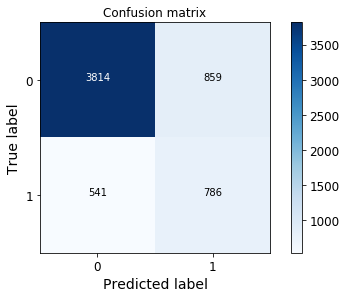

In [89]:
# Plot confusion matrix

class_names = [0,1]
plt.figure()
plot_confusion_matrix(CM
                      , classes=class_names
                      , title='Confusion matrix')
plt.show()

## Making individual predictions

In [90]:
# function of making individual prediction

def make_ind_prediction(new_data):
    data=new_data.values.reshape(1,-1)
    data=robust_scaler.transform(data)
    prob=logistic_regression.predict_proba(data)[0][1]
    if prob >=0.2:
        return 'Will default'
    else:
        return 'Will pay'
    

In [91]:
# Pass a single customer info

from collections import OrderedDict
new_customer = OrderedDict([('limit_bal',4000),('age',50),('bill_amt1',500),('bill_amt2',35509),('bill_amt3',689),('bill_amt4',0),('bill_amt5',0),('bill_amt6',500),('pay_amt1',0),('pay_amt2',35509),('pay_amt3',0),('pay_amt4',0),('pay_amt5',0),('pay_amt6',0),('male',1),('grad_school',0),('university',1),('high school',0),('married',1),('Pay_0',-1),('Pay_2',-1),('Pay_3',-1),('Pay_4',0),('Pay_5',-1),('Pay_6',0)])                                          

In [92]:
new_customer=pd.Series(new_customer)

In [93]:
make_ind_prediction(new_customer)

'Will default'

In [94]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

RF = RandomForestClassifier(random_state=123)

In [95]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)

In [96]:
from sklearn.model_selection import GridSearchCV
param_grid = [{'n_estimators':  [4, 5, 10, 20, 50]}]

grid_search_RF = GridSearchCV(RF, param_grid, cv=5 ,scoring='roc_auc')
grid_search_RF.fit(x_train,y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=123, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'n_estimators': [4, 5, 10, 20, 50]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [97]:
grid_search_RF.best_params_

{'n_estimators': 50}

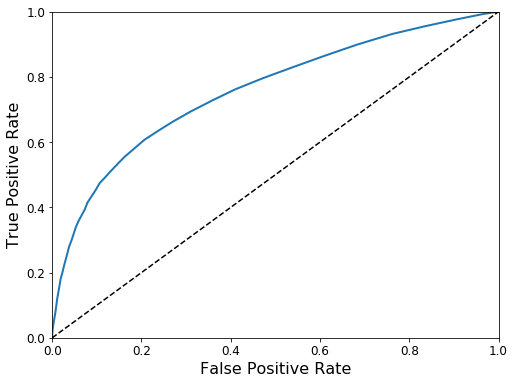

In [98]:
best_model = grid_search_RF.best_estimator_

y_probas_RF = cross_val_predict(best_model, x_train,y_train, cv=5, method="predict_proba")
y_scores_RF = y_probas_RF[:, 1] 
fpr_RF, tpr_RF, thresholds_RF = roc_curve(y_train,y_scores_RF)

plt.figure(figsize=(8, 6))
plot_roc_curve(fpr_RF, tpr_RF)

plt.show()

In [99]:
from sklearn.neighbors import KNeighborsClassifier

KNN = KNeighborsClassifier()


In [100]:
param_grid = [{'n_neighbors':  [3, 5, 10, 20]}]

grid_search_KNN1= GridSearchCV(KNN, param_grid, cv=5 ,scoring='roc_auc')
grid_search_KNN1.fit(x_train,y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'n_neighbors': [3, 5, 10, 20]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [101]:
grid_search_KNN1.best_params_

{'n_neighbors': 20}

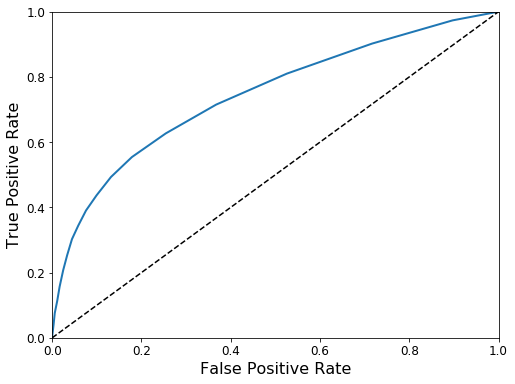

In [102]:
best_KNN_model = grid_search_KNN.best_estimator_

y_probas_KNN = cross_val_predict(best_KNN_model, x_train,y_train, cv=5, method="predict_proba")
y_scores_KNN = y_probas_KNN[:, 1] 
fpr_KNN, tpr_KNN, thresholds_KNN = roc_curve(y_train,y_scores_KNN)
                                             
plt.figure(figsize=(8, 6))
plot_roc_curve(fpr_KNN, tpr_KNN, "KNN")

plt.show()

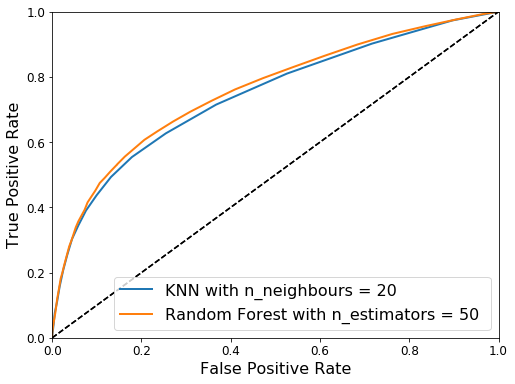

In [103]:
plt.figure(figsize=(8, 6))
plot_roc_curve(fpr_KNN, tpr_KNN, "KNN with n_neighbours = 20")
plot_roc_curve(fpr_RF, tpr_RF, "Random Forest with n_estimators = 50 ")
plt.legend(loc="lower right", fontsize=16)
plt.show()

Conclusions?


 Random Forest with n_estimators = 50 is a better model as it has high true positive rate when under same false positive rate compared with KNN.